# BAX Emittance Minimization (LCLS-II)
In this notebook, we hope to demonstrate Bayesian Algorithm Execution (BAX) in Xopt as a means of minimizing the emittance at LCLS-II. BAX is a generalization of Bayesian Optimization that seeks to acquire observations that provide our model with maximal information about our property of interest. In this example, our property of interest is the minimal emittance and its location in tuning-parameter-space. See https://arxiv.org/pdf/2209.04587.pdf for details.

In [1]:
# set up env for running on SLAC production servers
import os
os.environ['OMP_NUM_THREADS']=str(6)

In [2]:
run_dir = '/home/physics/ml_tuning/20240321_LCLS_II_Injector'

# Read pv info from YAML files

In [3]:
import sys
import yaml
sys.path.append("../../")
sys.path.append("../../../")

from common import get_pv_objects, save_reference_point, set_magnet_strengths, \
    measure_pvs

In [4]:
pv_bounds = yaml.safe_load(open("../../pv_bounds.yml"))
pv_objects = get_pv_objects("../../tracked_pvs.yml")

In [5]:
pv_bounds

{'QUAD:GUNB:212:1:BCTRL': [-0.005, 0.005],
 'QUAD:GUNB:212:2:BCTRL': [-0.005, 0.005],
 'QUAD:GUNB:823:1:BCTRL': [-0.005, 0.005],
 'QUAD:GUNB:823:2:BCTRL': [-0.005, 0.005],
 'QUAD:HTR:120:BCTRL': [-4.48, 1],
 'QUAD:HTR:140:BCTRL': [-4.4778, 4.4762],
 'QUAD:HTR:300:BCTRL': [-4.46035, 4.4692],
 'QUAD:HTR:320:BCTRL': [-4.46919, 4.4792],
 'SOLN:GUNB:212:BCTRL': [0.044, 0.044574],
 'SOLN:GUNB:823:BCTRL': [0.021, 0.0255]}

# load reference point
Also define a function to write the reference values to the pvs

In [6]:
reference = yaml.safe_load(open("../../reference.yml"))

def reset_pvs():
    set_magnet_strengths(reference, pv_objects, validate=False)

In [7]:
reference

{'QUAD:GUNB:212:1:BCTRL': 0.0023,
 'QUAD:GUNB:212:2:BCTRL': 0.0014125000000000001,
 'QUAD:GUNB:823:1:BCTRL': 0.003,
 'QUAD:GUNB:823:2:BCTRL': 0.0033875,
 'QUAD:HTR:120:BCTRL': -2.2331855578374693,
 'QUAD:HTR:140:BCTRL': 2.01213981773302,
 'QUAD:HTR:300:BCTRL': 1.1807187770838672,
 'QUAD:HTR:320:BCTRL': -2.0934402913247743,
 'SOLN:GUNB:212:BCTRL': 0.0442,
 'SOLN:GUNB:823:BCTRL': 0.025,
 'QUAD:COL0:320:BCTRL': 0.87}

In [50]:
reset_pvs()

QUAD:GUNB:212:1:BCTRL 0.0023
QUAD:GUNB:212:2:BCTRL 0.0014125000000000001
QUAD:GUNB:823:1:BCTRL 0.003
QUAD:GUNB:823:2:BCTRL 0.0033875
QUAD:HTR:120:BCTRL -2.2331855578374693
QUAD:HTR:140:BCTRL 2.01213981773302
QUAD:HTR:300:BCTRL 1.1807187770838672
QUAD:HTR:320:BCTRL -2.0934402913247743
SOLN:GUNB:212:BCTRL 0.0442
SOLN:GUNB:823:BCTRL 0.025
QUAD:COL0:320:BCTRL 0.87


In [9]:
from scripts.image import ImageDiagnostic, ROI
import yaml

fname = 'otr_PROF_COL0.yml' #run_dir + "OTRS_HTR_330_config.yml"

roi = ROI(
    ycenter=1005,
    xcenter=682,
    xwidth=600,
    ywidth=600
)
    

image_diagnostic = ImageDiagnostic.parse_obj(yaml.safe_load(open(fname)))
image_diagnostic.roi = roi
image_diagnostic.min_log_intensity = 5.0
image_diagnostic.save_image_location = run_dir
image_diagnostic.n_fitting_restarts = 2
image_diagnostic.visualize = False
print(image_diagnostic.yaml())


screen_name: PROF:COL0:535
array_data_suffix: Image:ArrayData
array_n_cols_suffix: Image:ArraySize0_RBV
array_n_rows_suffix: Image:ArraySize1_RBV
resolution_suffix: RESOLUTION
resolution: 19.71
beam_shutter_pv: TPR:LGUN:TS01:0:TRG00_SYS2_TCTL
extra_pvs: []
background_file: null
save_image_location: /home/physics/ml_tuning/20240321_LCLS_II_Injector
roi: {xcenter: 682, ycenter: 1005, xwidth: 600, ywidth: 600}
min_log_intensity: 5.0
bounding_box_half_width: 3.0
wait_time: 1.0
n_fitting_restarts: 2
visualize: false
return_statistics: false
threshold: 0.0
apply_bounding_box_constraint: true
testing: false



In [10]:
image_diagnostic.measure_background()

array([[0. , 0. , 0. , ..., 0.2, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.4, 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.2],
       ...,
       [0. , 0.6, 1. , ..., 0.4, 0. , 0. ],
       [0.2, 0.6, 0.2, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.2]])

displaying image
fitting image
{'Cx': 302.049415337265,
 'Cy': 297.54547427157115,
 'Sx': 16.656035167264584,
 'Sy': 28.30531181769392,
 'bb_penalty': -198.3170616017035,
 'log10_total_intensity': 6.227858076211364,
 'total_intensity': 1689888.5999999996}


{'Cx': 302.049415337265,
 'Cy': 297.54547427157115,
 'Sx': 328.29045314678496,
 'Sy': 557.8976959267471,
 'bb_penalty': -198.3170616017035,
 'total_intensity': 1689888.5999999996,
 'log10_total_intensity': 6.227858076211364}

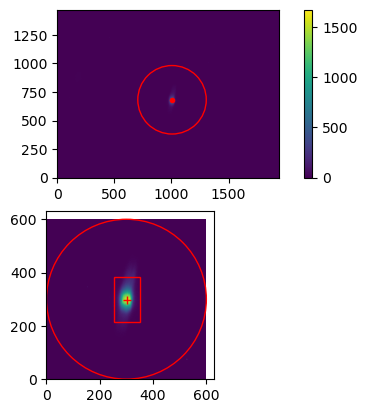

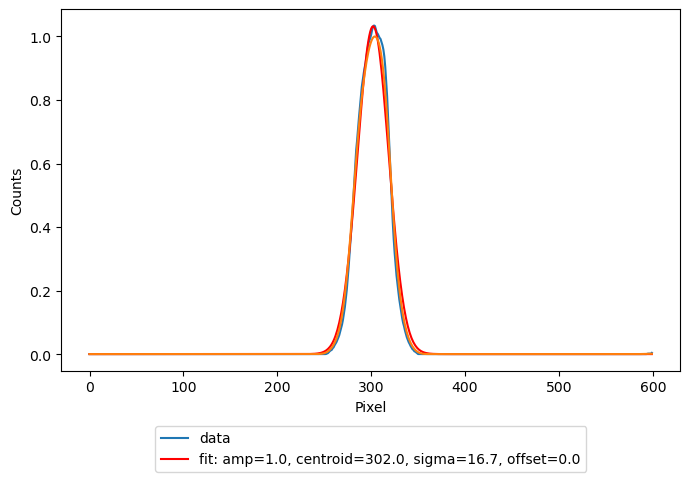

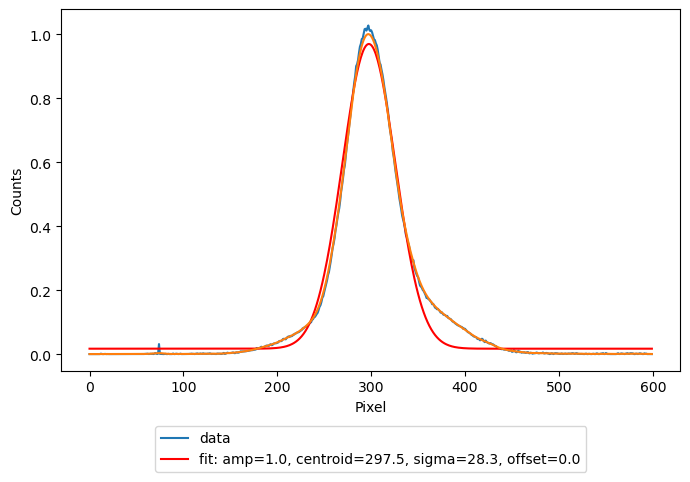

In [11]:
image_diagnostic.test_measurement()

# Imports

In [12]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")
import torch
from xopt import Xopt
from xopt.vocs import VOCS
from xopt.evaluator import Evaluator
import numpy as np
import random

# Evaluator

In [29]:
import time
# define function to measure the total size on OTR4
def eval_beamsize(inputs):
    
    # set pvs and wait for BACT to settle to correct values (validate=True)
    set_magnet_strengths(inputs, pv_objects, validate=False)
    time.sleep(3.5)
    # measure all pvs - except for names in inputs
    results = measure_pvs(
        [name for name in pv_objects.keys() if name not in inputs], pv_objects 
    )

    # do some calculations
    results["time"] = time.time()

    # add beam size measurement to results dict
    beamsize_results = image_diagnostic.measure_beamsize(1)
    results["Sx_mm"] = np.array(beamsize_results["Sx"]) * 1e-3
    results["Sy_mm"] = np.array(beamsize_results["Sy"]) * 1e-3

    #add beam size squared (mm^2)
    results["xrms_sq"] = results["Sx_mm"]**2
    results["yrms_sq"] = results["Sy_mm"]**2
    results = beamsize_results | results
    return results

evaluator = Evaluator(function=eval_beamsize)


In [14]:
eval_beamsize({})

fitting image


{'Cx': 301.8037650963864,
 'Cy': 295.52268651746425,
 'Sx': 328.16342772158777,
 'Sy': 572.623773580063,
 'bb_penalty': -194.76105219381628,
 'total_intensity': 1696335.1999999997,
 'log10_total_intensity': 6.229511674056513,
 'save_filename': '/home/physics/ml_tuning/20240321_LCLS_II_Injector/PROF_COL0_535_1711027487.h5',
 'QUAD:HTR:140:BCTRL': 2.01213981773302,
 'QUAD:HTR:300:BCTRL': 1.1807187770838672,
 'QUAD:HTR:320:BCTRL': -2.0934402913247743,
 'SOLN:GUNB:212:BCTRL': 0.0442,
 'QUAD:GUNB:212:1:BCTRL': 0.0023,
 'QUAD:GUNB:212:2:BCTRL': 0.0014125000000000001,
 'SOLN:GUNB:823:BCTRL': 0.025,
 'QUAD:GUNB:823:1:BCTRL': 0.003,
 'QUAD:GUNB:823:2:BCTRL': 0.0033875,
 'ACCL:GUNB:455:PDES': -126.7,
 'ACCL:L0B:0110:ADES': 6.5,
 'ACCL:L0B:0110:PDES': 0.0,
 'ACCL:L0B:0130:PDES': 0.0,
 'QUAD:HTR:120:BCTRL': -2.2331855578374693,
 'QUAD:COL0:320:BCTRL': 0.87,
 'time': 1711027487.2751071,
 'Sx_mm': 0.3281634277215878,
 'Sy_mm': 0.572623773580063,
 'xrms_sq': 0.10769123529398178,
 'yrms_sq': 0.3278979

## VOCS

In [38]:
# create Xopt objects
from xopt import VOCS

IMAGE_CONSTRAINTS = {
            "bb_penalty": ["LESS_THAN", 0.0],
        }

vocs = VOCS(
    variables = {
        'SOLN:GUNB:823:BCTRL': [0.0225, 0.0285],
        'QUAD:COL0:320:BCTRL': [-1.0, 2.5],
        'QUAD:GUNB:823:2:BCTRL': [-0.005, 0.005],
        'QUAD:GUNB:823:1:BCTRL': [-0.005, 0.005],
        #'SOLN:GUNB:212:BCTRL': [0.044, 0.044574],
        #'QUAD:GUNB:212:2:BCTRL': [-0.005, 0.005],
        #'QUAD:GUNB:212:1:BCTRL': [-0.005, 0.005],
    },
    constraints = IMAGE_CONSTRAINTS,
    observables = ["xrms_sq", "yrms_sq"],
)
vocs.variable_names

['QUAD:COL0:320:BCTRL',
 'QUAD:GUNB:823:1:BCTRL',
 'QUAD:GUNB:823:2:BCTRL',
 'SOLN:GUNB:823:BCTRL']

# Run Bayesian Exploration on a grid

In [39]:
from gpytorch.kernels import MaternKernel, PolynomialKernel, ScaleKernel
from xopt.generators.bayesian.bayesian_exploration import BayesianExplorationGenerator
from xopt.numerical_optimizer import GridOptimizer
from xopt.generators.bayesian.models.standard import StandardModelConstructor
from copy import deepcopy
sys.path.append("../../emitopt/")

meas_dim = 0
tuning_dims = [1,2,3]

covar_module = (MaternKernel(ard_num_dims=len(tuning_dims),
                              active_dims=tuning_dims,
                              lengthscale_prior=None) *
                              PolynomialKernel(power=2, active_dims=[meas_dim])
                 )
scaled_covar_module = ScaleKernel(covar_module)

# prepare options for Xopt generator
covar_module_dict = {
    'xrms_sq': scaled_covar_module,
    "yrms_sq": deepcopy(scaled_covar_module)
}
# covar_module_dict = {}
model_constructor = StandardModelConstructor(
    covar_modules=covar_module_dict, use_low_noise_prior=True
)

generator = BayesianExplorationGenerator(
    vocs=vocs,
    gp_constructor=model_constructor,
    numerical_optimizer=GridOptimizer(n_grid_points=5),
    n_interpolate_points=5
)

from xopt import Xopt
X_bayes_exp = Xopt(
    vocs=vocs,
    generator=generator,
    evaluator=evaluator,
    strict=True
)

## sample in local area around reference point

In [40]:
from epics import caget_many
from xopt.utils import get_local_region

reset_pvs()
current_value = dict(
    zip(
        X_bayes_exp.vocs.variable_names,
        caget_many(X_bayes_exp.vocs.variable_names)
    )
)
print(current_value)


random_sample_region = get_local_region(current_value,X_bayes_exp.vocs, fraction=0.1)
X_bayes_exp.random_evaluate(10, custom_bounds=random_sample_region)

QUAD:GUNB:212:1:BCTRL 0.0023
QUAD:GUNB:212:2:BCTRL 0.0014125000000000001
QUAD:GUNB:823:1:BCTRL 0.003
QUAD:GUNB:823:2:BCTRL 0.0033875
QUAD:HTR:120:BCTRL -2.2331855578374693
QUAD:HTR:140:BCTRL 2.01213981773302
QUAD:HTR:300:BCTRL 1.1807187770838672
QUAD:HTR:320:BCTRL -2.0934402913247743
SOLN:GUNB:212:BCTRL 0.0442
SOLN:GUNB:823:BCTRL 0.025
QUAD:COL0:320:BCTRL 0.87
{'QUAD:COL0:320:BCTRL': 0.87, 'QUAD:GUNB:823:1:BCTRL': 0.003, 'QUAD:GUNB:823:2:BCTRL': 0.0033875, 'SOLN:GUNB:823:BCTRL': 0.025}
QUAD:COL0:320:BCTRL 0.572118757739563
QUAD:GUNB:823:1:BCTRL 0.002914551071880739
QUAD:GUNB:823:2:BCTRL 0.0033108864729627006
SOLN:GUNB:823:BCTRL 0.025049810029927372
fitting image
QUAD:COL0:320:BCTRL 1.0332221430632194
QUAD:GUNB:823:1:BCTRL 0.002798741943586058
QUAD:GUNB:823:2:BCTRL 0.004009436016934643
SOLN:GUNB:823:BCTRL 0.025144393970028704
fitting image
QUAD:COL0:320:BCTRL 1.0691384576435863
QUAD:GUNB:823:1:BCTRL 0.00213724377696256
QUAD:GUNB:823:2:BCTRL 0.0037253709454804717
SOLN:GUNB:823:BCTRL 0.02

,QUAD:COL0:320:BCTRL,QUAD:GUNB:823:1:BCTRL,QUAD:GUNB:823:2:BCTRL,SOLN:GUNB:823:BCTRL,Cx,Cy,Sx,Sy,bb_penalty,total_intensity,...,ACCL:L0B:0110:PDES,ACCL:L0B:0130:PDES,QUAD:HTR:120:BCTRL,time,Sx_mm,Sy_mm,xrms_sq,yrms_sq,xopt_runtime,xopt_error
0,0.572119,0.002915,0.003311,0.025050,307.696450,288.434718,439.375264,715.484070,-158.319588,1744226.8,...,0.0,0.0,-2.233186,1.711032e+09,0.439375,0.715484,0.193051,0.511917,4.836024,False
1,1.033222,0.002799,0.004009,0.025144,302.843694,313.040482,363.023320,738.127441,-161.805445,1743321.2,...,0.0,0.0,-2.233186,1.711032e+09,0.363023,0.738127,0.131786,0.544832,4.740350,False
2,1.069138,0.002137,0.003725,0.025061,299.996892,312.777612,348.789736,688.914648,-170.938998,1692977.2,...,0.0,0.0,-2.233186,1.711032e+09,0.348790,0.688915,0.121654,0.474603,4.827648,False
3,0.949393,0.003521,0.002472,0.025177,300.146396,299.338744,330.325936,510.100291,-206.866606,1631064.4,...,0.0,0.0,-2.233186,1.711032e+09,0.330326,0.510100,0.109115,0.260202,4.754938,False
4,0.591503,0.003619,0.004021,0.025479,305.233880,292.447346,406.138802,678.212268,-170.507368,1750758.8,...,0.0,0.0,-2.233186,1.711032e+09,0.406139,0.678212,0.164949,0.459972,4.814024,False
5,0.568954,0.002437,0.003494,0.024897,308.085447,289.385973,464.825044,694.811015,-159.441319,1772362.6,...,0.0,0.0,-2.233186,1.711032e+09,0.464825,0.694811,0.216062,0.482762,4.787323,False
6,0.755223,0.003460,0.003096,0.025440,304.722632,292.560938,341.131037,720.038898,-169.978320,1728735.4,...,0.0,0.0,-2.233186,1.711032e+09,0.341131,0.720039,0.116370,0.518456,4.823356,False
7,0.634118,0.002837,0.004387,0.025525,306.580079,295.416848,407.665916,772.990905,-159.814021,1726803.8,...,0.0,0.0,-2.233186,1.711032e+09,0.407666,0.772991,0.166191,0.597515,4.741683,False
8,1.071231,0.002251,0.004293,0.025443,300.773380,316.710368,353.466641,639.240411,-173.604139,1618539.8,...,0.0,0.0,-2.233186,1.711032e+09,0.353467,0.639240,0.124939,0.408628,4.746858,False
9,0.937768,0.003236,0.002790,0.024691,299.886334,292.112732,338.167176,535.945227,-196.731181,1709892.8,...,0.0,0.0,-2.233186,1.711032e+09,0.338167,0.535945,0.114357,0.287237,4.811789,False


In [41]:
import time
start = time.time()
for i in range(10):
    X_bayes_exp.step()
print(time.time() - start)

QUAD:COL0:320:BCTRL 0.5502167170542269
QUAD:GUNB:823:1:BCTRL 0.001590919573790166
QUAD:GUNB:823:2:BCTRL 0.0012343337015518735
SOLN:GUNB:823:BCTRL 0.025450702666986853
fitting image
QUAD:COL0:320:BCTRL 0.16266504118575076
QUAD:GUNB:823:1:BCTRL -5.4310272681465203e-05
QUAD:GUNB:823:2:BCTRL -0.0003217496768601843
SOLN:GUNB:823:BCTRL 0.026210526868513877
fitting image
QUAD:COL0:320:BCTRL -0.22488663468272563
QUAD:GUNB:823:1:BCTRL -0.0016995401191530965
QUAD:GUNB:823:2:BCTRL -0.0018778330552722423
SOLN:GUNB:823:BCTRL 0.026970351070040897
fitting image
QUAD:COL0:320:BCTRL -0.6124383105512017
QUAD:GUNB:823:1:BCTRL -0.003344769965624728
QUAD:GUNB:823:2:BCTRL -0.0034339164336843
SOLN:GUNB:823:BCTRL 0.02773017527156792
fitting image
QUAD:COL0:320:BCTRL -0.9999899864196777
QUAD:GUNB:823:1:BCTRL -0.004989999812096357
QUAD:GUNB:823:2:BCTRL -0.004989999812096357
SOLN:GUNB:823:BCTRL 0.02848999947309494
fitting image
QUAD:COL0:320:BCTRL -0.29999399185180664
QUAD:GUNB:823:1:BCTRL -0.0029939998872578143

## Visualize model/data

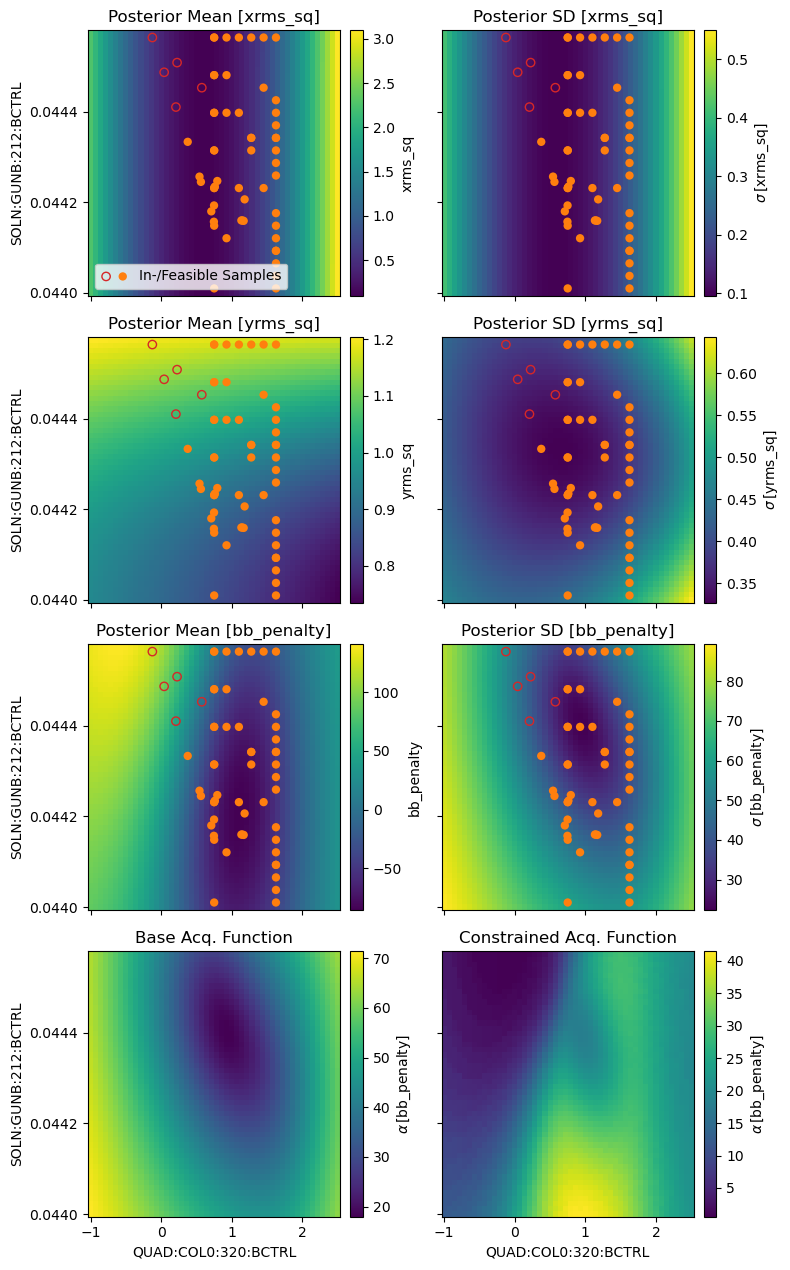

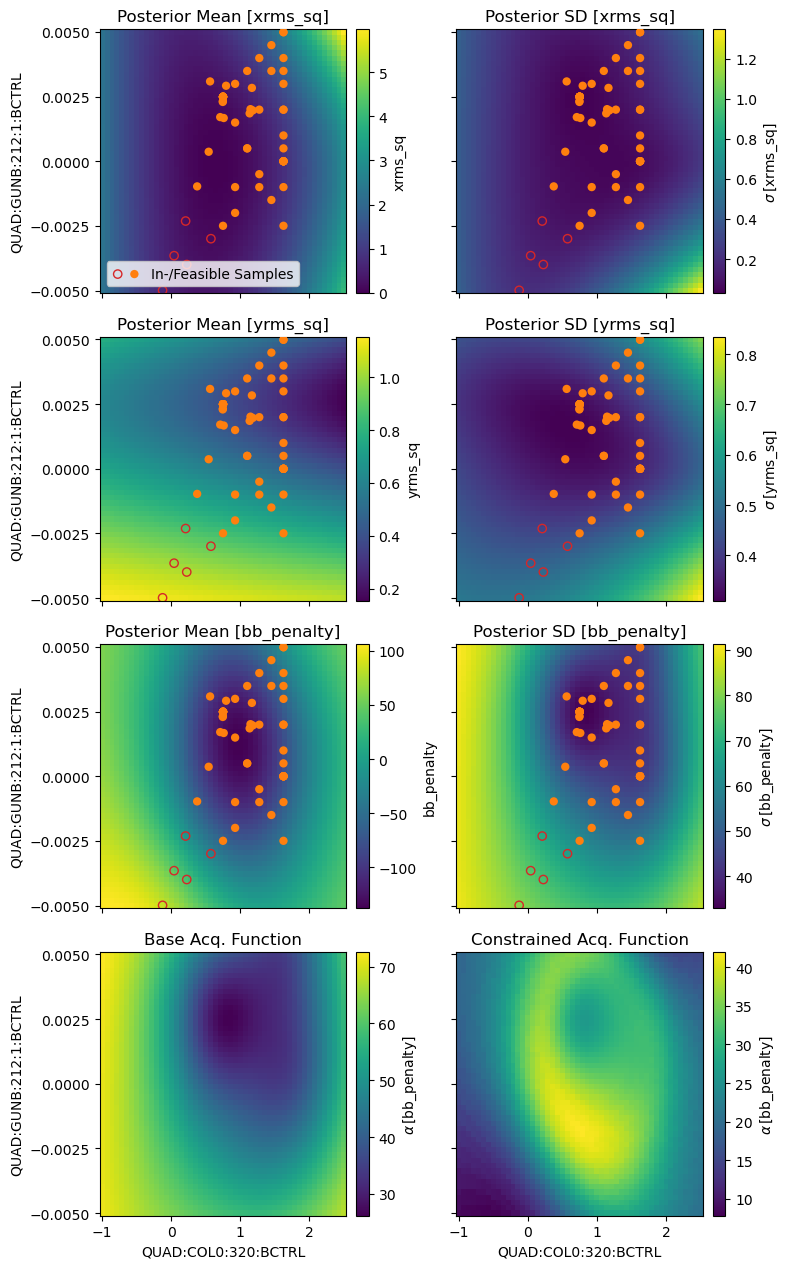

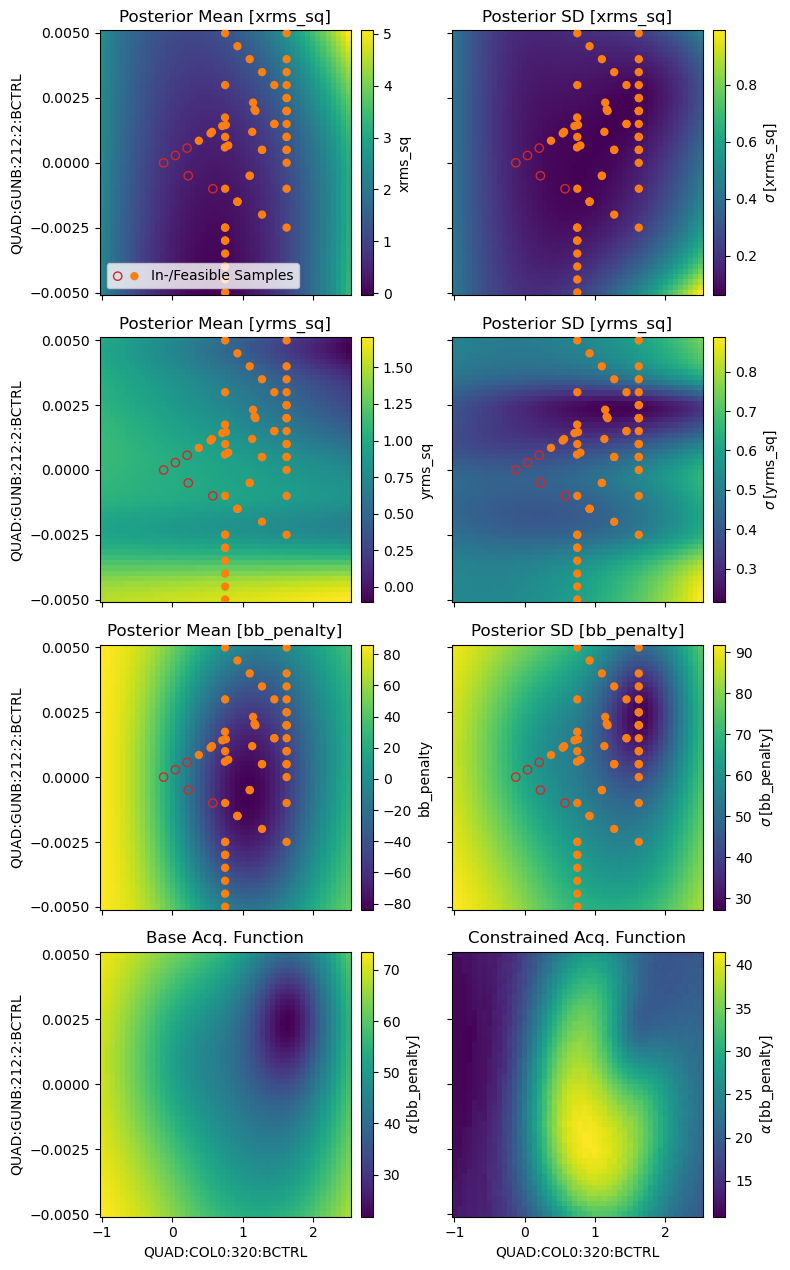

In [23]:
from xopt.generators.bayesian.visualize import visualize_generator_model
fig,ax = visualize_generator_model(
    X_bayes_exp.generator,
    variable_names=['QUAD:COL0:320:BCTRL','SOLN:GUNB:212:BCTRL'],
    output_names=["xrms_sq","yrms_sq","bb_penalty"],
)

fig,ax = visualize_generator_model(
    X_bayes_exp.generator,
    variable_names=['QUAD:COL0:320:BCTRL','QUAD:GUNB:212:1:BCTRL'],
    output_names=["xrms_sq","yrms_sq","bb_penalty"],
)

fig,ax = visualize_generator_model(
    X_bayes_exp.generator,
    variable_names=['QUAD:COL0:320:BCTRL','QUAD:GUNB:212:2:BCTRL'],
    output_names=["xrms_sq","yrms_sq","bb_penalty"],
)


# Run BAX

In [42]:
from gpytorch.kernels import MaternKernel, PolynomialKernel, ScaleKernel
from xopt.generators.bayesian.models.standard import StandardModelConstructor
from copy import deepcopy
import torch
from emitopt.algorithms import ScipyMinimizeEmittanceXY

meas_dim = 0
tuning_dims = [1,2,3]

covar_module = (MaternKernel(ard_num_dims=len(tuning_dims),
                              active_dims=tuning_dims,
                              lengthscale_prior=None) *
                              PolynomialKernel(power=2, active_dims=[meas_dim])
                 )
scaled_covar_module = ScaleKernel(covar_module)

# prepare options for Xopt generator
covar_module_dict = {'xrms_sq': scaled_covar_module, "yrms_sq": deepcopy(scaled_covar_module)}
model_constructor = StandardModelConstructor(
    covar_modules=covar_module_dict, use_low_noise_prior=True
)

QUAD_LENGTH = 0.108 # m
rmat_x = torch.tensor([[1.3698,   11.8648 ],
                       [-0.1455,   -0.5302]])
rmat_y = torch.tensor([[-0.1685 ,   7.9883],
                        [-0.1462,    0.9989]])
THICK_QUAD = False
BEAM_ENERGY = 0.088 # GeV
SCALE_FACTOR = 3.460718747080956 # multiplicative factor to convert from measurement quad PV units to geometric focusing strength

algo_kwargs = {
        'x_key': "xrms_sq",
        'y_key': "yrms_sq",
        'scale_factor': SCALE_FACTOR,
        'q_len': QUAD_LENGTH,
        'rmat_x': rmat_x,
        'rmat_y': rmat_y,
        'n_samples': 20,
        'meas_dim': meas_dim,
        'n_steps_measurement_param': 11,
        'thick_quad': THICK_QUAD,
        'init': 'smallest',
        'scipy_options': {'maxiter':25},
        'jitter': 0.1
}
algo = ScipyMinimizeEmittanceXY(**algo_kwargs)

In [43]:
import yaml
import pandas as pd
#d = yaml.safe_load(open("BAX_run_be.yml"))
#old_data = pd.DataFrame(d["data"])

# Initialize Xopt Optimizer

In [44]:
from xopt.generators.bayesian.bax_generator import BaxGenerator



#construct BAX generator
generator = BaxGenerator(
    vocs=vocs,
    gp_constructor=model_constructor,
    algorithm=algo,
    #numerical_optimizer=GridOptimizer(n_grid_points=10),
    n_interpolate_points=5
)
generator.numerical_optimizer.max_time = 10.0
generator.numerical_optimizer.n_restarts = 32

#construct Xopt optimizer and add data
X_bax = Xopt(
    evaluator=evaluator,
    generator=generator,
    vocs=vocs,
    dump_file="BAX_run_be_OTR6_2.yml"
)
X_bax.add_data(X_bayes_exp.data)

In [45]:
import time
start = time.time()
for i in range(10):
    print(i)
    X_bax.step()
print(time.time() - start)

0
QUAD:COL0:320:BCTRL 1.3818884695293598
QUAD:GUNB:823:1:BCTRL 0.004551580258317384
QUAD:GUNB:823:2:BCTRL 0.004401394093336602
SOLN:GUNB:823:BCTRL 0.02543679738921728
fitting image
QUAD:COL0:320:BCTRL 1.1387819458488808
QUAD:GUNB:823:1:BCTRL 0.004113160704538411
QUAD:GUNB:823:2:BCTRL 0.0038127883745768462
SOLN:GUNB:823:BCTRL 0.02537359525527172
fitting image
QUAD:COL0:320:BCTRL 0.8956754221684018
QUAD:GUNB:823:1:BCTRL 0.003674741150759438
QUAD:GUNB:823:2:BCTRL 0.0032241826558170902
SOLN:GUNB:823:BCTRL 0.02531039312132616
fitting image
QUAD:COL0:320:BCTRL 0.6525688984879229
QUAD:GUNB:823:1:BCTRL 0.003236321596980465
QUAD:GUNB:823:2:BCTRL 0.0026355769370573347
SOLN:GUNB:823:BCTRL 0.0252471909873806
fitting image
QUAD:COL0:320:BCTRL 0.4094623748074439
QUAD:GUNB:823:1:BCTRL 0.002797902043201492
QUAD:GUNB:823:2:BCTRL 0.002046971218297579
SOLN:GUNB:823:BCTRL 0.02518398885343504
fitting image
1
QUAD:COL0:320:BCTRL 0.723381616012305
QUAD:GUNB:823:1:BCTRL 0.00292394457691771
QUAD:GUNB:823:2:BCT

In [ ]:
X_bax.dump()

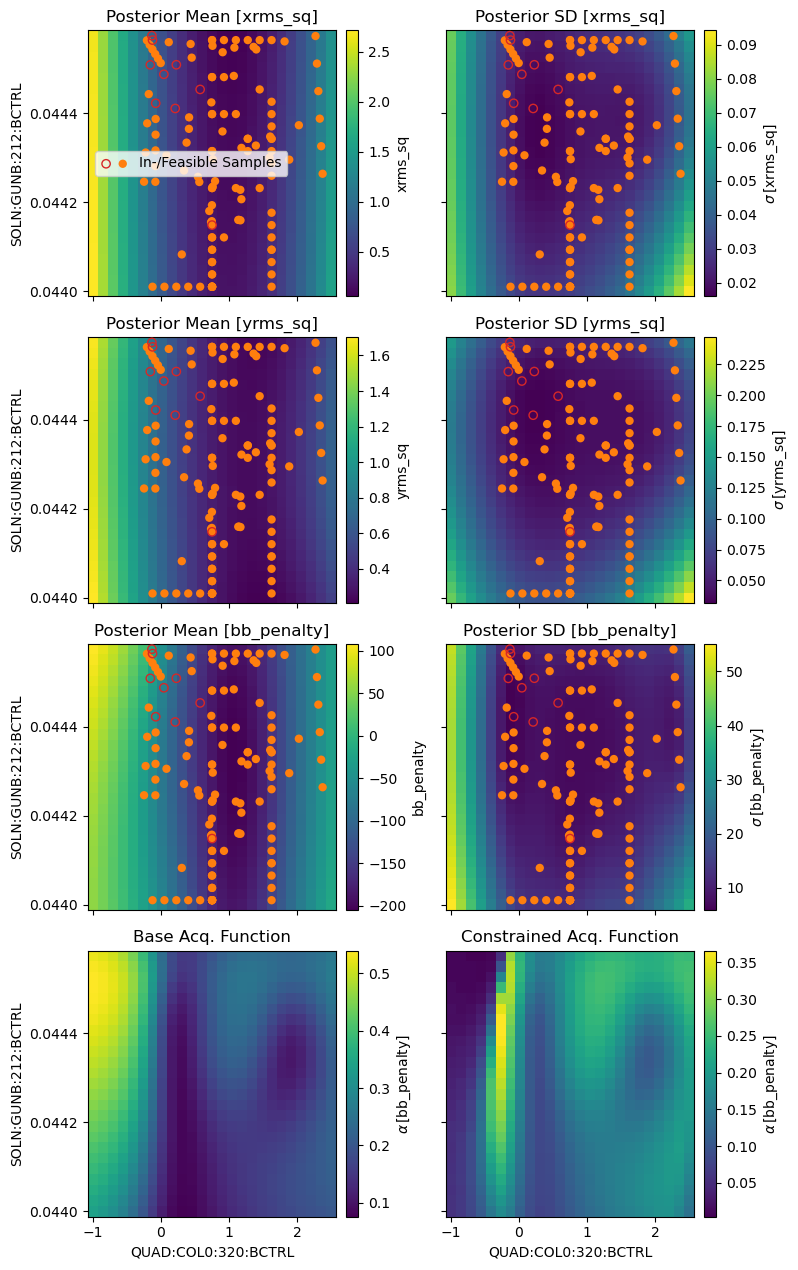

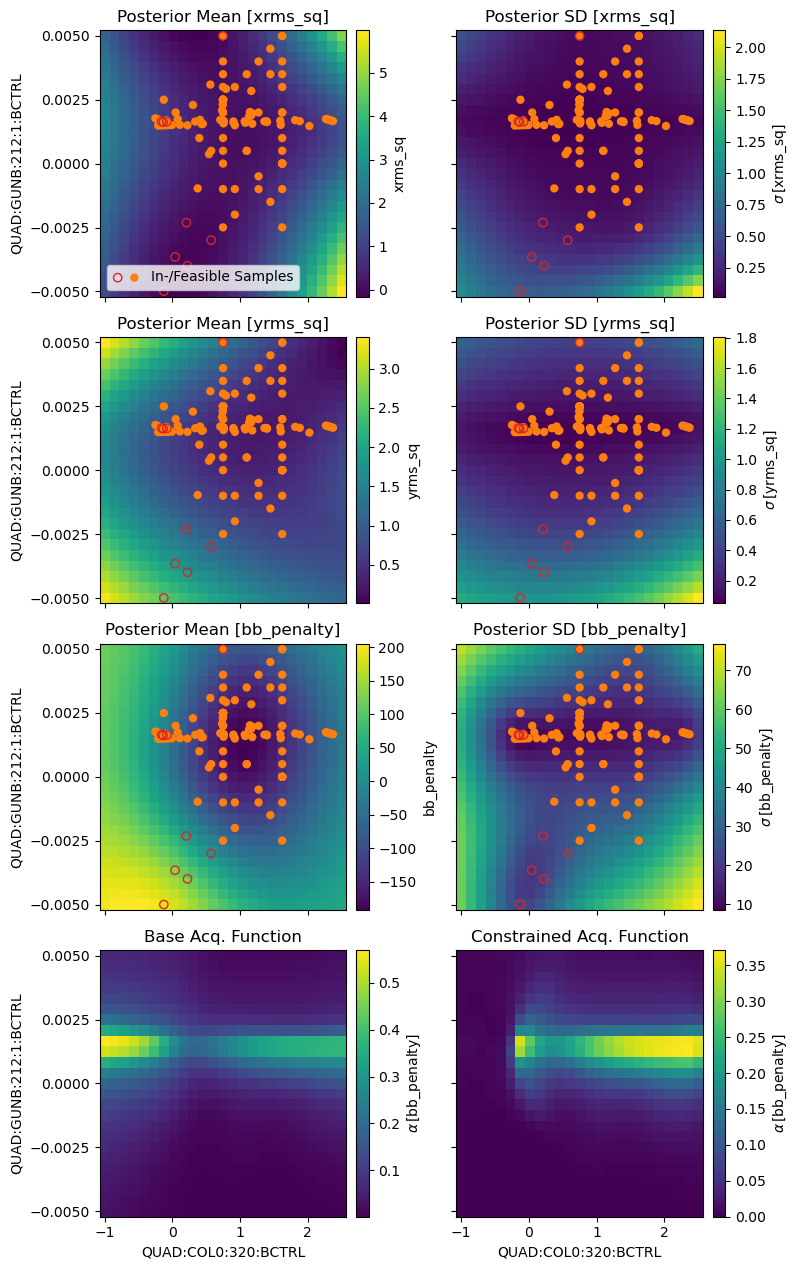

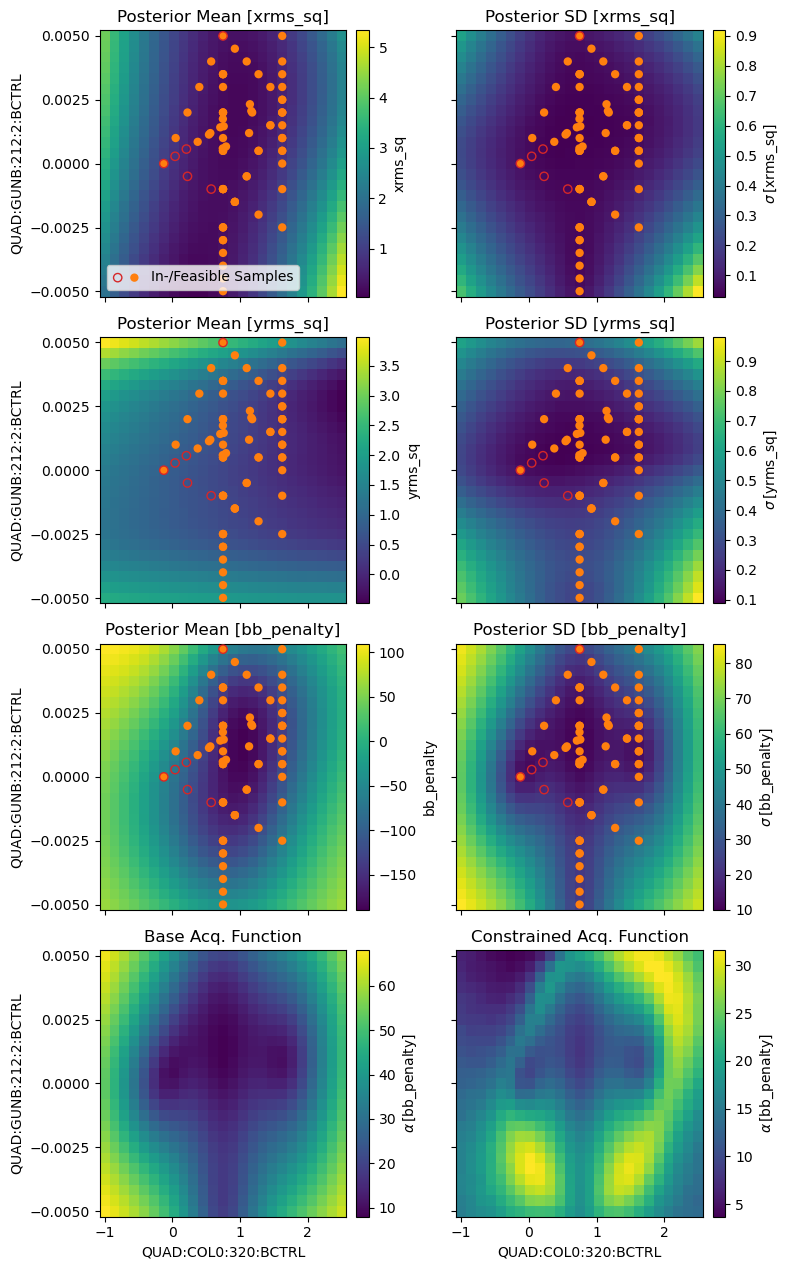

In [36]:
X_bax.generator.train_model()
fig,ax = visualize_generator_model(
    X_bax.generator,
    variable_names=['QUAD:COL0:320:BCTRL','SOLN:GUNB:212:BCTRL'],
    output_names=["xrms_sq","yrms_sq","bb_penalty"],
    n_grid=25
)

fig,ax = visualize_generator_model(
    X_bax.generator,
    variable_names=['QUAD:COL0:320:BCTRL','QUAD:GUNB:212:1:BCTRL'],
    output_names=["xrms_sq","yrms_sq","bb_penalty"],
    n_grid=25
)

fig,ax = visualize_generator_model(
    X_bayes_exp.generator,
    variable_names=['QUAD:COL0:320:BCTRL','QUAD:GUNB:212:2:BCTRL'],
    output_names=["xrms_sq","yrms_sq","bb_penalty"],
    n_grid=25
)

## view data and model

{'QUAD:GUNB:823:1:BCTRL': tensor(0.0033, dtype=torch.float64), 'QUAD:GUNB:823:2:BCTRL': tensor(0.0029, dtype=torch.float64), 'SOLN:GUNB:823:BCTRL': tensor(0.0254, dtype=torch.float64)}


(<Figure size 900x600 with 6 Axes>,
 array([[<Axes: xlabel='QUAD:GUNB:823:1:BCTRL', ylabel='Emittance'>,
         <Axes: xlabel='QUAD:GUNB:823:2:BCTRL'>,
         <Axes: xlabel='SOLN:GUNB:823:BCTRL'>],
        [<Axes: xlabel='QUAD:GUNB:823:1:BCTRL', ylabel='Sample Validity Rate'>,
         <Axes: xlabel='QUAD:GUNB:823:2:BCTRL'>,
         <Axes: xlabel='SOLN:GUNB:823:BCTRL'>]], dtype=object))

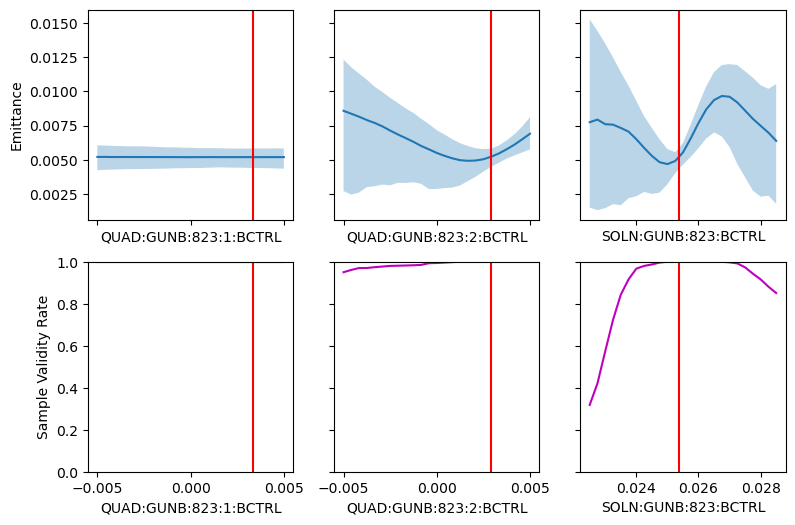

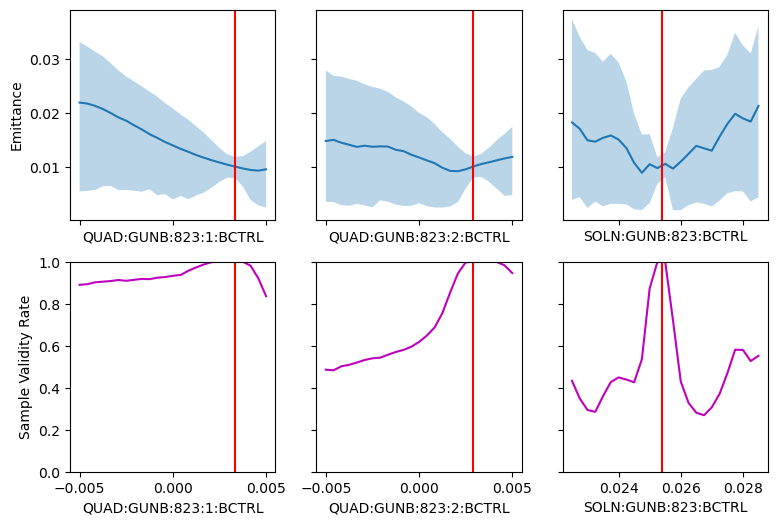

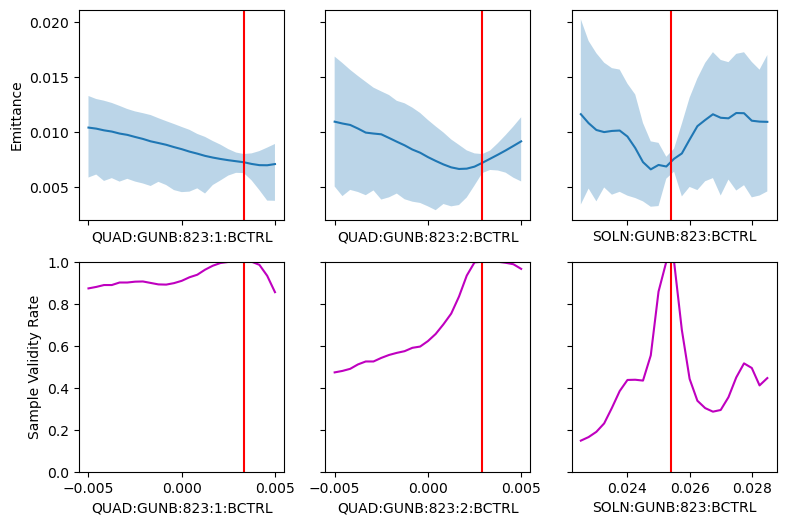

In [46]:
from emitopt.plot_utils import plot_virtual_emittance
from emitopt.utils import get_bax_optimum
best_x = get_bax_optimum(X_bax.generator)
print(best_x)
plot_virtual_emittance(
    X_bax, best_x, 
    n_points=25, dim="x"
)
plot_virtual_emittance(
    X_bax, best_x, 
    n_points=25, dim="y"
)
plot_virtual_emittance(
    X_bax, best_x, 
    n_points=25
)

In [ ]:
from emitopt.plot_utils import plot_sample_optima_convergence_inputs
fig, axs = plot_sample_optima_convergence_inputs(results, show_valid_only=False)

In [ ]:
from xopt.generators.bayesian.visualize import visualize_generator_model
visualize_generator_model(
    X_bax.generator,
    variable_names=['QUAD:HTR:120:BCTRL'],
    reference_point = best_x
)


In [47]:
best_x

{'QUAD:GUNB:823:1:BCTRL': tensor(0.0033, dtype=torch.float64),
 'QUAD:GUNB:823:2:BCTRL': tensor(0.0029, dtype=torch.float64),
 'SOLN:GUNB:823:BCTRL': tensor(0.0254, dtype=torch.float64)}

In [ ]:
from xopt.generators.bayesian.visualize import visualize_generator_model
visualize_generator_model(
    X_bax.generator,
    variable_names=['QUAD:HTR:120:BCTRL'],
    reference_point = {'SOLN:GUNB:823:BCTRL': 0.022}
)


In [49]:
X_bax.evaluate_data(
    {'QUAD:GUNB:823:1:BCTRL': 0.0033,
 'QUAD:GUNB:823:2:BCTRL': 0.0029,
 'SOLN:GUNB:823:BCTRL': 0.0254,
'QUAD:COL0:320:BCTRL':0.75}
)

QUAD:GUNB:823:1:BCTRL 0.0033
QUAD:GUNB:823:2:BCTRL 0.0029
SOLN:GUNB:823:BCTRL 0.0254
QUAD:COL0:320:BCTRL 0.75
fitting image


,QUAD:GUNB:823:1:BCTRL,QUAD:GUNB:823:2:BCTRL,SOLN:GUNB:823:BCTRL,QUAD:COL0:320:BCTRL,Cx,Cy,Sx,Sy,bb_penalty,total_intensity,...,ACCL:L0B:0110:PDES,ACCL:L0B:0130:PDES,QUAD:HTR:120:BCTRL,time,Sx_mm,Sy_mm,xrms_sq,yrms_sq,xopt_runtime,xopt_error
0,0.0033,0.0029,0.0254,0.75,304.986254,297.140954,354.094451,459.241741,-206.40016,1727517.6,...,0.0,0.0,-2.233186,1.711032e+09,0.354094,0.459242,0.125383,0.210903,4.73469,False
